In [1]:
%pip install boto3
%pip install pandas
%pip install matplotlib
%pip install io

     |████████████████████████████████| 139 kB 35.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 265 kB/s  eta 0:00:01
     |████████████████████████████████| 11.8 MB 86.4 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 88.3 MB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.3 MB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 84.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.2 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 84.2 MB/s eta 0:00:01
     |█████████████

In [5]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import io
import math

In [3]:
# Nome do bucket e arquivo
BUCKET_NAME = 'bucket-trusted-upa-connect-eduardo'  # seu bucket
CSV_FILE_KEY = 'camera_visao_comp_tratado.csv/part-00000-f0f426ad-1185-4a19-9418-a1100e28dd25-c000.csv'  # exemplo: 'pasta/arquivo.csv'

# Cria o cliente S3 usando a Role da EC2
s3 = boto3.client('s3')

# Faz o download do objeto CSV
obj = s3.get_object(Bucket=BUCKET_NAME, Key=CSV_FILE_KEY)

# Lê o CSV diretamente da memória
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

/usr/local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [4]:
# Exibe o DataFrame (opcional)
display(df.head())

,dia,numero_dia_semana,media_pessoas
0,2025-04-07,2,236.864865
1,2025-04-21,2,45.166667
2,2025-04-22,3,67.722222
3,2025-04-23,4,35.851852
4,2025-04-24,5,34.000000


In [11]:
df_mapeado = pd.DataFrame()
df_mapeado['media'] = df['media_pessoas'].apply(lambda x: round(x, 0))

# Nomear os meses
nome_dias = { 1: 'Dom', 2: 'Seg', 3: 'Ter', 4: 'Qua', 5: 'Qui', 6: 'Sex', 7: 'Sab'}
df_mapeado['dia_semana'] = df['numero_dia_semana'].apply(lambda x: nome_dias[x])

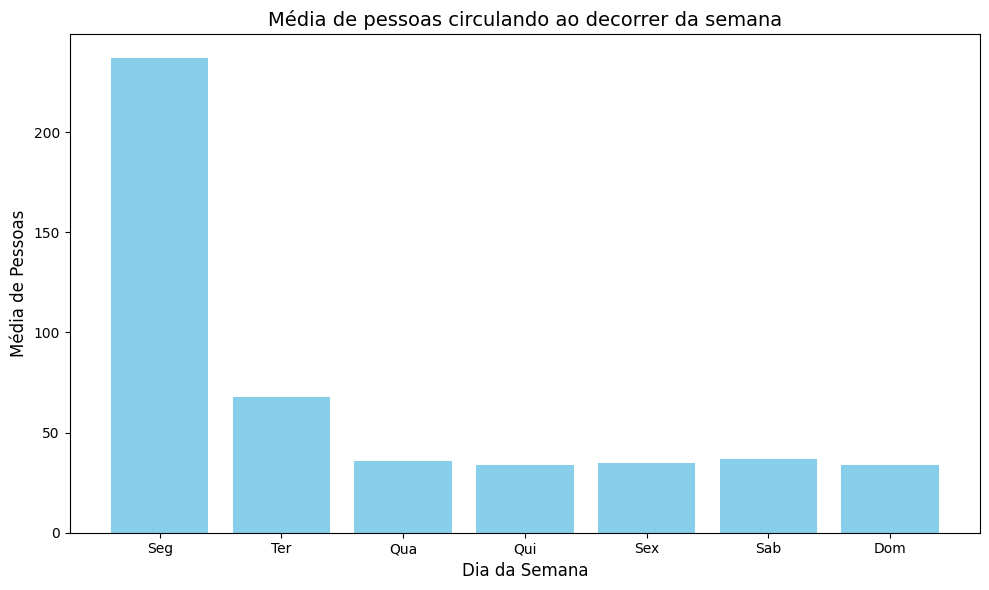

In [14]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.bar(df_mapeado['dia_semana'], df_mapeado['media'], color='skyblue')

ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Média de Pessoas', fontsize=12)
ax.set_title('Média de pessoas circulando ao decorrer da semana', fontsize=14)
plt.tight_layout()
plt.show()